In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import MultipleLocator
from collections import Counter
from collections import defaultdict
import os
import seaborn as sns

In [ ]:
df = pd.read_csv("..\\data\\task3\\jobdata_get_skills.csv")

In [4]:
hard_skills_column = df['hard_skills']
soft_skills_column = df['soft_skills']

# 技能整体数量情况

## 软硬技能数量

In [5]:
# 技能提取
id_to_skills = defaultdict(lambda: [[], []])

def parse_skills(skills_str):
    if skills_str == "无":
        return []
    else:
        # print(skills_str, type(skills_str))
        return eval(skills_str)

df['hard_skills'] = df['hard_skills'].apply(lambda x: x if isinstance(x, list) else parse_skills(x))
df['soft_skills'] = df['soft_skills'].apply(lambda x: x if isinstance(x, list) else parse_skills(x))


for index, row in df.iterrows():
    job_id = row['custom_id']
    hard_skills = row['hard_skills']
    soft_skills = row['soft_skills']

    id_to_skills[job_id][0].extend(hard_skills)
    id_to_skills[job_id][1].extend(soft_skills)


# 检查
num_items_to_print = 5
for i, (key, value) in enumerate(id_to_skills.items()):
    if i >= num_items_to_print:
        break
    print(f"ID: {key}, 硬/软技能要求: {value}")

ID: Lcer-s-mfC1_DTn4Xhi8B, 硬/软技能要求: [['媒体运营', '视觉设计', '数据处理', '内容策略'], ['组织技能', '交际能力']]
ID: j2iMOLV8nyaPmi7N4i7vW, 硬/软技能要求: [['媒体运营', '数据处理'], ['个人素养', '交际能力', '市场管理']]
ID: avZPqlcVKpPDNHyTPUeQd, 硬/软技能要求: [['媒体运营', '数据处理'], ['组织技能', '交际能力']]
ID: GsSA5fS_1ur0eWLbv0Pgl, 硬/软技能要求: [['数据处理', '内容策略', '媒体运营'], ['市场管理']]
ID: MWp8dcg3q2v49IP6jqWlM, 硬/软技能要求: [['媒体运营', '数据处理'], ['个人素养', '抗压能力', '交际能力']]


In [13]:
# 统计
hard_skills = Counter()
soft_skills = Counter()

for skills in id_to_skills.values():
    hard_skills.update(skills[0])
    soft_skills.update(skills[1])

sorted_hard_skills = sorted(hard_skills.items(), key = lambda x: x[1], reverse = True)
sorted_soft_skills = sorted(soft_skills.items(), key = lambda x: x[1], reverse = True)

print(sorted_hard_skills)
print(sorted_soft_skills)

[('媒体运营', 8106), ('数据处理', 7719), ('写作能力', 7689), ('内容策略', 6974), ('多媒体技术', 5331), ('产品管理', 3822), ('编辑排版', 2276), ('摄影摄像', 1784), ('受众分析', 1726), ('研究能力', 1517), ('视觉设计', 1406), ('技术素养', 1354), ('新闻敏感', 473), ('新闻报道', 343), ('程序设计', 240), ('采访调查', 239), ('网页设计', 147), ('主持演讲', 65), ('播音播报', 60)]
[('交际能力', 8087), ('组织技能', 7355), ('市场管理', 6533), ('抗压能力', 4859), ('个人素养', 3745), ('职业道德', 2387), ('领导能力', 989), ('关系管理', 975), ('学科知识', 539), ('外语能力', 472), ('形象管理', 68), ('其他知识', 59)]


In [6]:
# 指定中文字体
font_path = "D:\\安装包\\微软雅黑.ttf"

zh_font = font_manager.FontProperties(fname = font_path)

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 
plt.rcParams['axes.unicode_minus'] = False 

In [ ]:
hard_skill_names = [x[0] for x in sorted_hard_skills]
hard_skill_counts = [x[1] for x in sorted_hard_skills]

soft_skill_names = [x[0] for x in sorted_soft_skills]
soft_skill_counts = [x[1] for x in sorted_soft_skills]

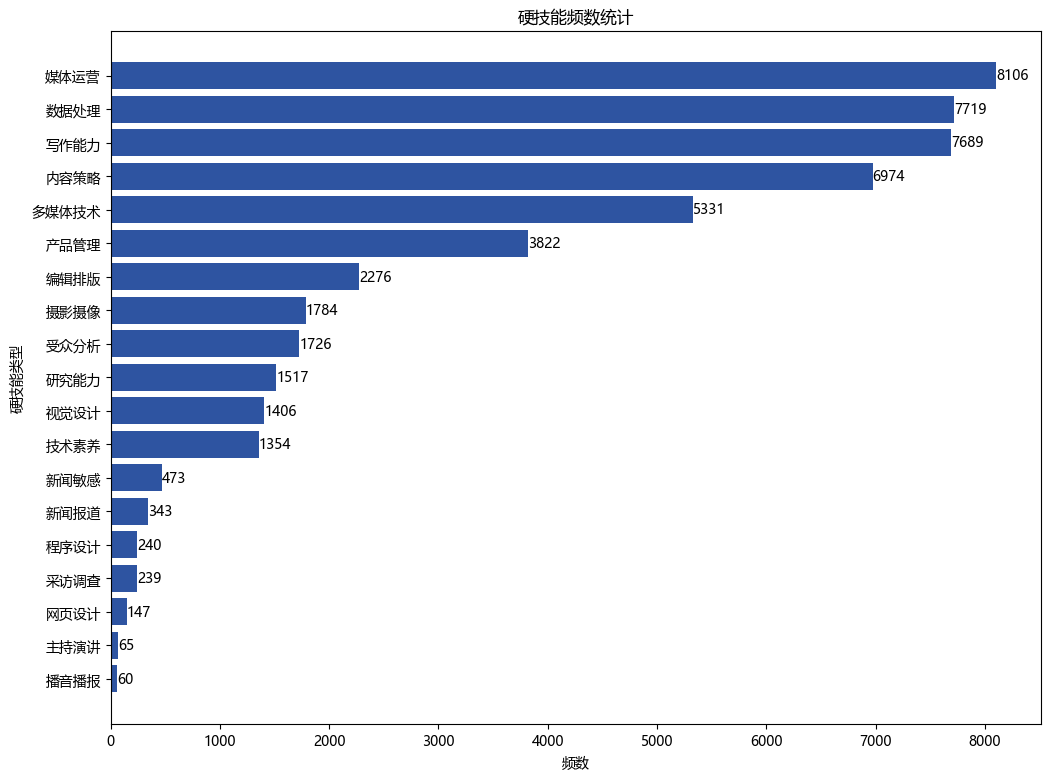

In [ ]:
plt.figure(figsize=(12, 9)) 
plt.barh(hard_skill_names, hard_skill_counts, color='#2E54A1')
plt.title("硬技能频数统计")
plt.xlabel("频数")
plt.ylabel("硬技能类型")
plt.gca().invert_yaxis() 

for i, v in enumerate(hard_skill_counts):
    plt.text(v + 0.1, i, str(v), va='center', color='black')

output_path = os.path.join("..\\img\\task3", "硬技能频数统计.png")
plt.savefig(output_path, dpi = 300, bbox_inches='tight')

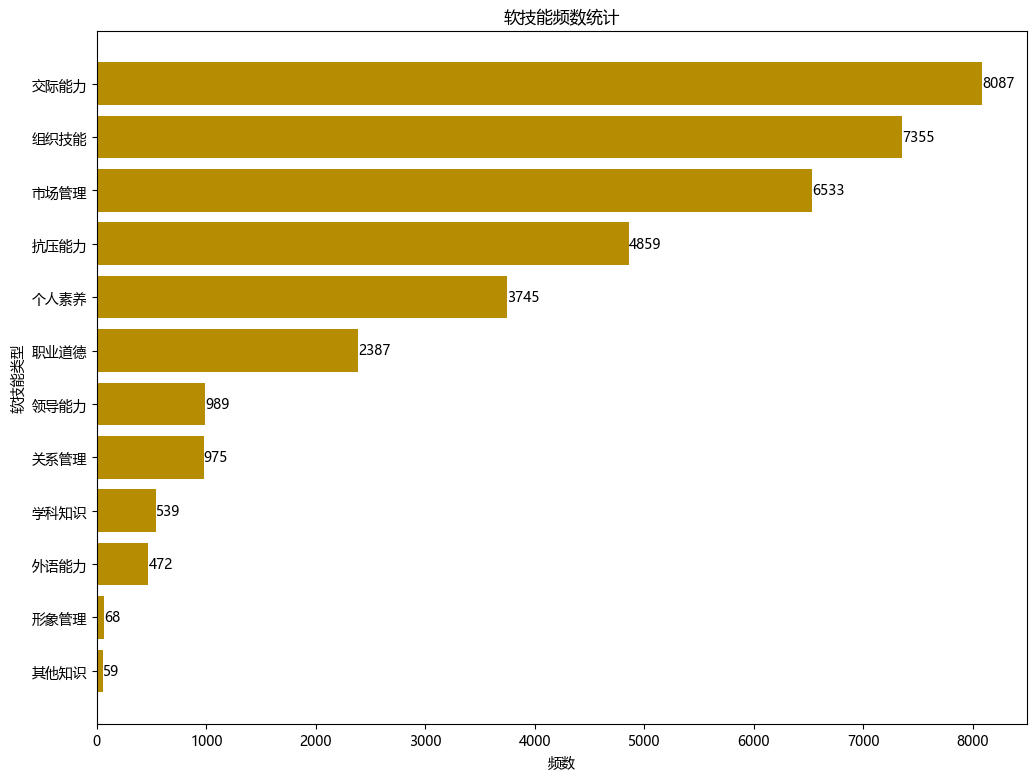

In [ ]:
plt.figure(figsize=(12, 9)) 
plt.barh(soft_skill_names, soft_skill_counts, color = '#B68C02')
plt.title("软技能频数统计")
plt.xlabel("频数")
plt.ylabel("软技能类型")
plt.gca().invert_yaxis() 

for i, v in enumerate(soft_skill_counts):
    plt.text(v + 0.1, i, str(v), va='center', color='black')

output_path = os.path.join("..\\img\\task3", "软技能频数统计.png")
plt.savefig(output_path, dpi = 300, bbox_inches='tight')

# 技能的关联分析

In [3]:
def co_analysis_for_else(column, skill_type):
    skills_data = [] 

    for id, skills in id_to_skills.items():
        if skill_type == "hard":
            skills_list = skills[0]
        elif skill_type == "soft":
            skills_list = skills[1]

        for skill in skills_list:
            column_type = df[df['custom_id'] == id][column].values[0]
            skills_data.append({str(column): column_type, '技能': skill}) 


    skills_df = pd.DataFrame(skills_data, columns=[column, '技能'])


    skills_count = skills_df.groupby([column, '技能']).size().reset_index(name='频数')


    skills_sorted = skills_count.sort_values(by=[column, '频数'], ascending=[True, False])

    
    columns = skills_sorted[column].unique()

    top_skills_length = skills_sorted.groupby(column).size()  
    max_length = top_skills_length.max()  

    skills_sorted_df = pd.DataFrame(index=range(max_length), columns=pd.MultiIndex.from_product([columns, ['技能', '频数']]))

    for col in columns:
        city_skills = skills_sorted[skills_sorted[column] == col]
        num_skills = len(city_skills)
        
        skills_sorted_df[(col, '技能')][:num_skills] = city_skills['技能'].values
        skills_sorted_df[(col, '频数')][:num_skills] = city_skills['频数'].values

    skills_sorted_df.fillna('', inplace=True)

    print(skills_sorted_df)
    return skills_sorted_df


## 与岗位类型的关联分析

### 硬技能

In [90]:
skills_sorted_by_job_types_df = co_analysis_for_else('岗位分类', "hard")

   AI产品经理     AI训练师    APP推广     BD经理       BI     ...    风控    飞机设计制造     \
       技能  频数    技能 频数    技能 频数    技能 频数    技能 频数  ...    技能 频数     技能 频数   
0    产品管理  50  技术素养  2  媒体运营  6  数据处理  3  技术素养  1  ...  数据处理  1   写作能力  1   
1    技术素养  35  数据处理  2  数据处理  2  媒体运营  2  数据处理  1  ...            数据处理  1   
2    数据处理  35           内容策略  1  内容策略  1           ...            研究能力  1   
3    研究能力  19                    受众分析  1           ...            编辑排版  1   
4    写作能力   9                    研究能力  1           ...            采访调查  1   
5    受众分析   8                                      ...                      
6    内容策略   6                                      ...                      
7    程序设计   5                                      ...                      
8    媒体运营   2                                      ...                      
9   多媒体技术   1                                      ...                      
10   编辑排版   1                                      ...                      

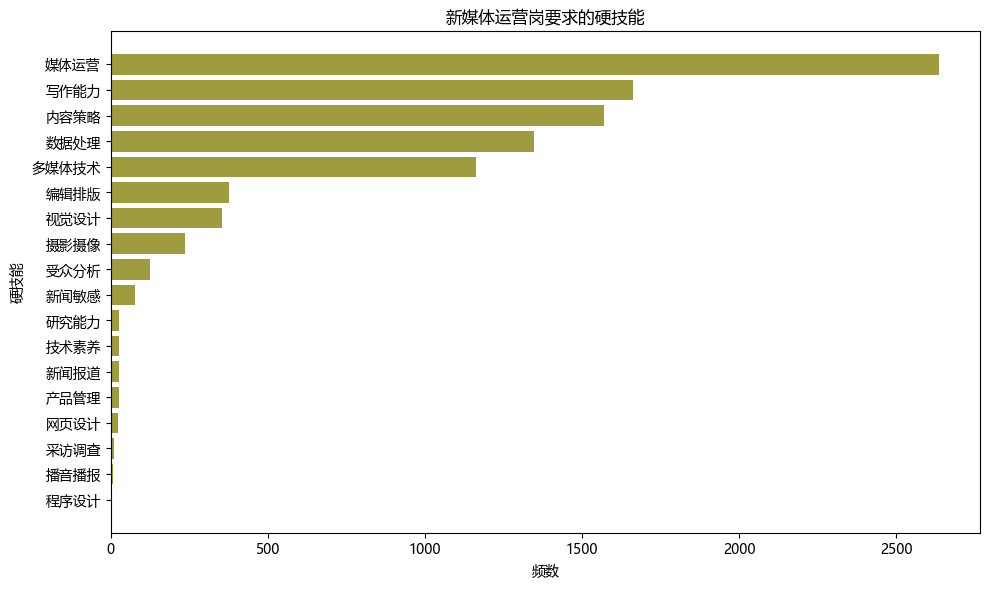

In [ ]:
# 新媒体运营需要哪些硬技能（招的多）
top_count_job_type_skills = skills_sorted_by_job_types_df[('新媒体运营', '技能')].dropna()
top_count_job_type_frequencies = skills_sorted_by_job_types_df[('新媒体运营', '频数')].dropna()

plt.figure(figsize=(10, 6))
plt.barh(top_count_job_type_skills, top_count_job_type_frequencies, color='#9F9B3F')
plt.xlabel('频数')
plt.ylabel('硬技能')
plt.title('新媒体运营岗要求的硬技能')
plt.gca().invert_yaxis() 
plt.tight_layout()

output_path = os.path.join("..\\img\\task3", "新媒体运营岗要求的硬技能.png")
plt.savefig(output_path, dpi = 300, bbox_inches='tight')

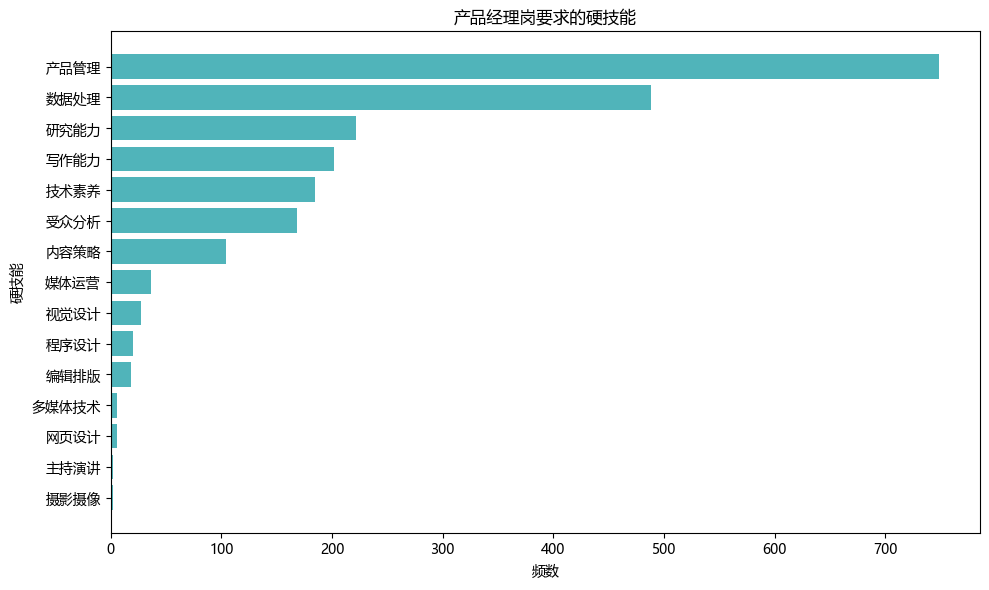

In [ ]:
# 产品经理需要哪些硬技能（招的多）
pm_hard_skills = skills_sorted_by_job_types_df[('产品经理', '技能')].dropna()
pm_hard_frequencies = skills_sorted_by_job_types_df[('产品经理', '频数')].dropna()

pm_hard_frequencies = pd.to_numeric(pm_hard_frequencies, errors='coerce') 
pm_hard_skills = pm_hard_skills[pm_hard_frequencies.notna()] 
pm_hard_frequencies = pm_hard_frequencies.dropna()  

plt.figure(figsize=(10, 6))
plt.barh(pm_hard_skills, pm_hard_frequencies, color='#50B4BA')
plt.xlabel('频数')
plt.ylabel('硬技能')
plt.title('产品经理岗要求的硬技能')
plt.gca().invert_yaxis() 
plt.tight_layout()

output_path = os.path.join("..\\img\\task3", "产品经理岗要求的硬技能.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight')

### 软技能

In [65]:
soft_skills_sorted_by_job_types_df = co_analysis_for_else('岗位分类', "soft")

   AI产品经理     AI训练师    APP推广     BD经理       BI     ...    风控    飞机设计制造     \
       技能  频数    技能 频数    技能 频数    技能 频数    技能 频数  ...    技能 频数     技能 频数   
0    组织技能  35  抗压能力  2  交际能力  4  交际能力  3  交际能力  1  ...  抗压能力  1   交际能力  1   
1    抗压能力  27  组织技能  1  市场管理  2  市场管理  3  组织技能  1  ...  职业道德  1   组织技能  1   
2    交际能力  21           抗压能力  2  组织技能  2           ...                      
3    市场管理  18           个人素养  1  关系管理  1           ...                      
4    学科知识  14           组织技能  1                    ...                      
5    个人素养   8                                      ...                      
6    领导能力   3                                      ...                      
7    关系管理   2                                      ...                      
8    其他知识   1                                      ...                      
9    职业道德   1                                      ...                      
10                                                 ...                      

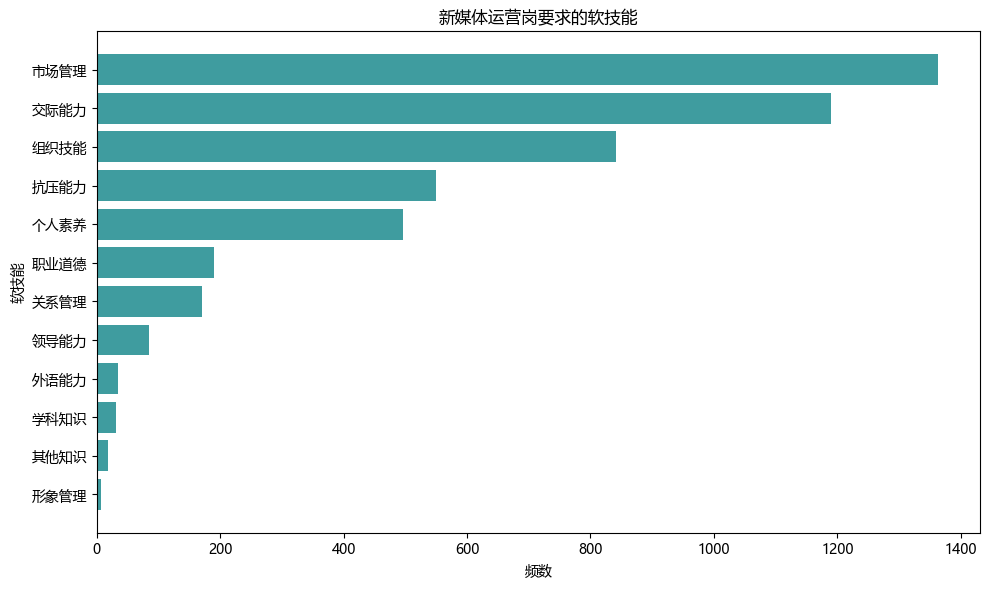

In [ ]:
# 新媒体运营需要哪些软技能（招的多）
top_count_job_type_skills = soft_skills_sorted_by_job_types_df[('新媒体运营', '技能')].dropna()
top_count_job_type_frequencies = soft_skills_sorted_by_job_types_df[('新媒体运营', '频数')].dropna()

plt.figure(figsize=(10, 6))
plt.barh(top_count_job_type_skills, top_count_job_type_frequencies, color='#3F9C9F')
plt.xlabel('频数')
plt.ylabel('软技能')
plt.title('新媒体运营岗要求的软技能')
plt.gca().invert_yaxis() 
plt.tight_layout()

output_path = os.path.join("..\\img\\task3", "新媒体运营岗要求的软技能.png")
plt.savefig(output_path, dpi = 300, bbox_inches='tight')

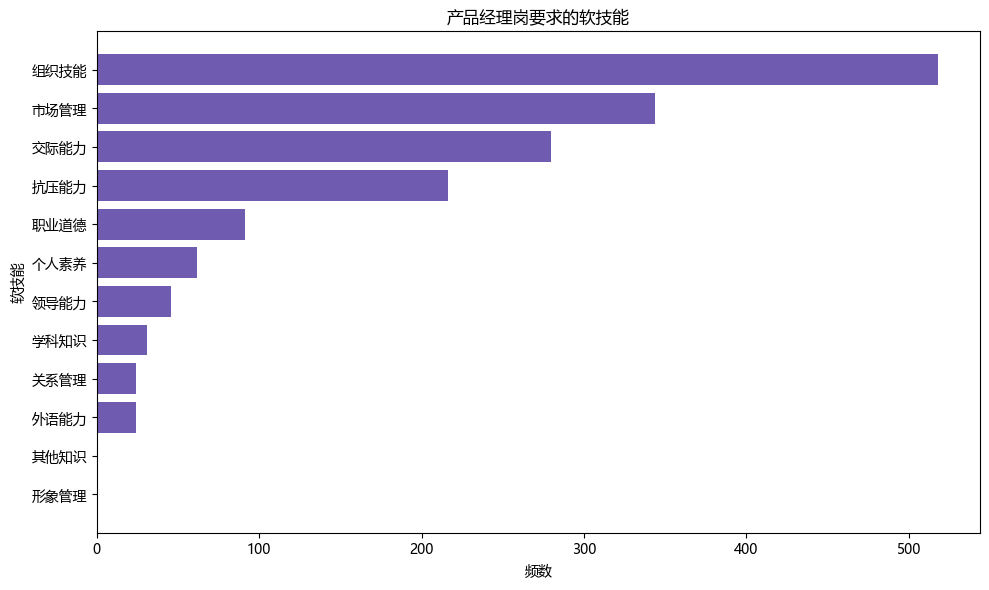

In [ ]:
# 产品经理需要哪些软技能（招的多）
pm_soft_skills = soft_skills_sorted_by_job_types_df[('产品经理', '技能')].dropna()
pm_soft_frequencies = soft_skills_sorted_by_job_types_df[('产品经理', '频数')].dropna()

pm_soft_frequencies = pd.to_numeric(pm_soft_frequencies, errors='coerce') 
pm_soft_skills = pm_soft_skills[pm_soft_frequencies.notna()] 
pm_soft_frequencies = pm_soft_frequencies.dropna()  

plt.figure(figsize=(10, 6))
plt.barh(pm_soft_skills, pm_soft_frequencies, color='#6F5BAF')
plt.xlabel('频数')
plt.ylabel('软技能')
plt.title('产品经理岗要求的软技能')
plt.gca().invert_yaxis() 
plt.tight_layout()

output_path = os.path.join("..\\img\\task3", "产品经理岗要求的软技能.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight')

## 与企业类型的关联分析

### 硬技能

In [76]:
hard_skills_sorted_by_comp_types_df = co_analysis_for_else('企业财产类型', "hard")

     上市公司        事业单位       代表处        其它          医院      ...     民营        \
       技能   频数     技能  频数    技能 频数     技能   频数     技能  频数  ...     技能    频数   
0    数据处理  590   写作能力  30  写作能力  5   媒体运营  391   媒体运营  53  ...   媒体运营  5078   
1    媒体运营  458   内容策略  19  内容策略  4   写作能力  379   写作能力  52  ...   写作能力  4905   
2    内容策略  406   编辑排版  18  媒体运营  4   内容策略  325   内容策略  47  ...   数据处理  4570   
3    产品管理  400   媒体运营  14  研究能力  4  多媒体技术  296   数据处理  36  ...   内容策略  4382   
4    写作能力  366   数据处理  12  数据处理  3   数据处理  283  多媒体技术  26  ...  多媒体技术  3453   
5   多媒体技术  185   研究能力  11  新闻报道  3   产品管理  114   视觉设计  11  ...   产品管理  2067   
6    受众分析  174  多媒体技术  10  新闻敏感  3   编辑排版  109   技术素养   7  ...   编辑排版  1417   
7    技术素养  127   技术素养   6  采访调查  3   摄影摄像   96   摄影摄像   6  ...   摄影摄像  1211   
8    研究能力  107   新闻报道   6  产品管理  1   视觉设计   78   研究能力   6  ...   受众分析   997   
9    编辑排版  104   新闻敏感   6  受众分析  1   受众分析   67   产品管理   5  ...   视觉设计   886   
10   摄影摄像   58   产品管理   5            技术素养   46   受众分

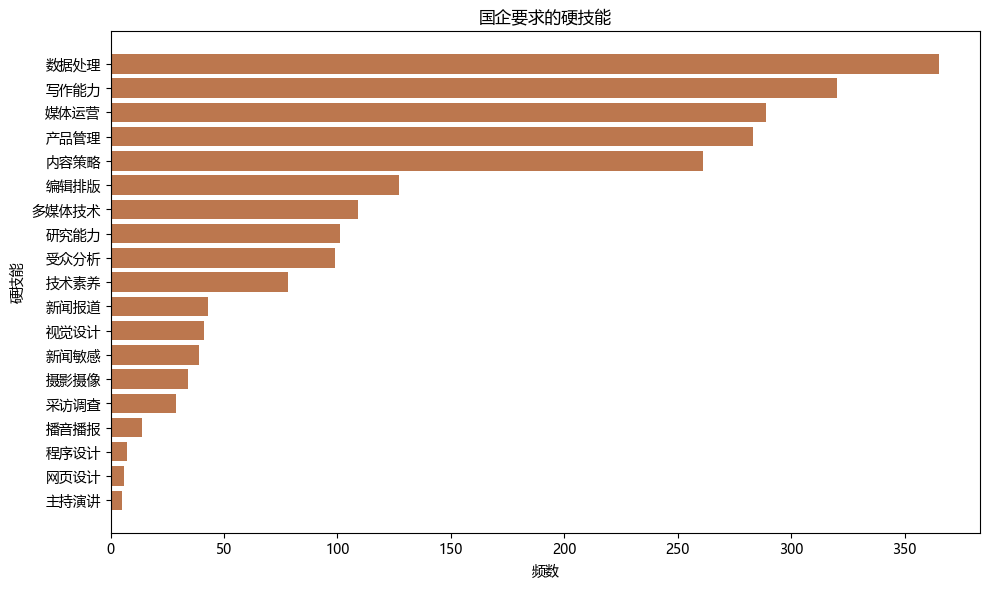

In [ ]:
# 国企要求的硬技能
guoqi_hard_skills = hard_skills_sorted_by_comp_types_df[('国企', '技能')].dropna()
guoqi_hard_frequencies = hard_skills_sorted_by_comp_types_df[('国企', '频数')].dropna()

plt.figure(figsize=(10, 6))
plt.barh(guoqi_hard_skills, guoqi_hard_frequencies, color='#BC774E')
plt.xlabel('频数')
plt.ylabel('硬技能')
plt.title('国企要求的硬技能')
plt.gca().invert_yaxis() 
plt.tight_layout()

output_path = os.path.join("..\\img\\task3", "国企要求的硬技能.png")
plt.savefig(output_path, dpi = 300, bbox_inches='tight')

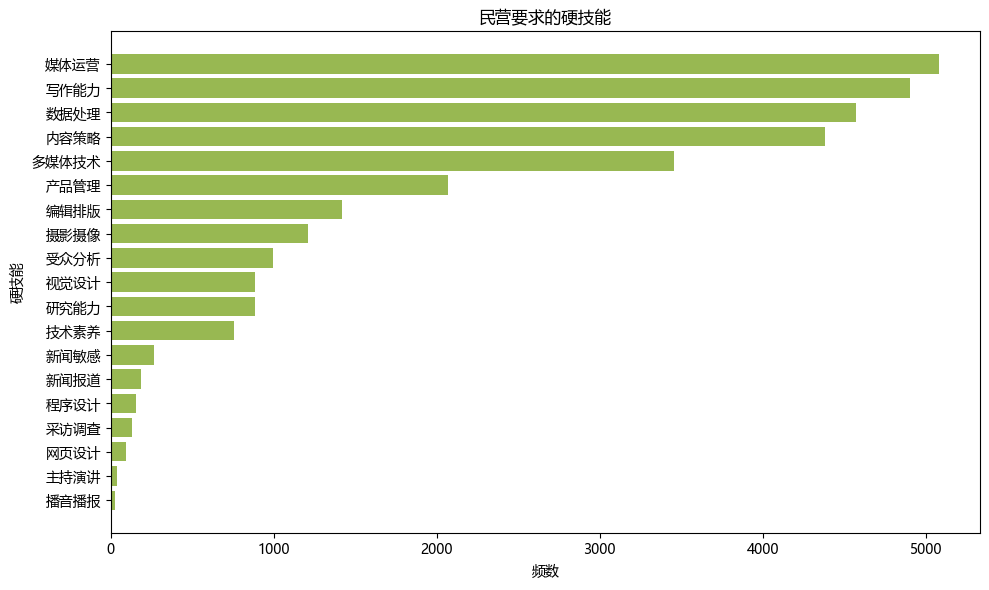

In [ ]:
# 民营要求的硬技能
minying_hard_skills = hard_skills_sorted_by_comp_types_df[('民营', '技能')].dropna()
minying_hard_frequencies = hard_skills_sorted_by_comp_types_df[('民营', '频数')].dropna()

plt.figure(figsize=(10, 6))
plt.barh(minying_hard_skills, minying_hard_frequencies, color='#98B852')
plt.xlabel('频数')
plt.ylabel('硬技能')
plt.title('民营要求的硬技能')
plt.gca().invert_yaxis() 
plt.tight_layout()

output_path = os.path.join("..\\img\\task3", "民营要求的硬技能.png")
plt.savefig(output_path, dpi = 300, bbox_inches='tight')

### 软技能

In [84]:
soft_skills_sorted_by_comp_types_df = co_analysis_for_else('企业财产类型', "soft")

    上市公司       事业单位       代表处       其它         医院      ...    民营       港澳台公司  \
      技能   频数    技能  频数    技能 频数    技能   频数    技能  频数  ...    技能    频数    技能   
0   交际能力  552  交际能力  17  市场管理  5  交际能力  402  交际能力  33  ...  交际能力  4814  组织技能   
1   组织技能  544  组织技能  17  交际能力  4  抗压能力  296  市场管理  26  ...  组织技能  4305  市场管理   
2   市场管理  456  职业道德  17  抗压能力  3  组织技能  296  组织技能  24  ...  市场管理  3875  交际能力   
3   抗压能力  370  个人素养  14  组织技能  2  市场管理  257  抗压能力  19  ...  抗压能力  2829  抗压能力   
4   个人素养  185  抗压能力  13  关系管理  1  个人素养  186  个人素养  16  ...  个人素养  2329  个人素养   
5   职业道德  154  学科知识   6  外语能力  1  职业道德  110  职业道德   5  ...  职业道德  1393  关系管理   
6   关系管理   80  外语能力   3           关系管理   50  领导能力   3  ...  领导能力   591  职业道德   
7   领导能力   51  市场管理   3           领导能力   49  关系管理   2  ...  关系管理   540  领导能力   
8   学科知识   43  领导能力   1           学科知识   30  其他知识   1  ...  学科知识   325  外语能力   
9   外语能力   36                     外语能力   15            ...  外语能力   314         
10  形象管理   10                     形象管理  

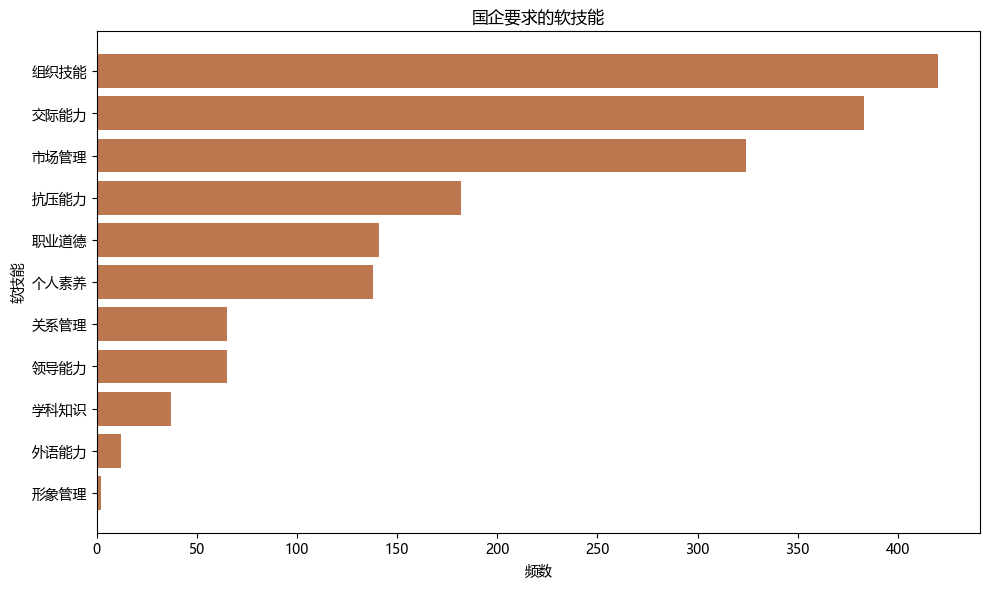

In [ ]:
# 国企要求的软技能
guoqi_soft_skills = soft_skills_sorted_by_comp_types_df[('国企', '技能')].dropna()
guoqi_soft_frequencies = soft_skills_sorted_by_comp_types_df[('国企', '频数')].dropna()

guoqi_soft_frequencies = pd.to_numeric(guoqi_soft_frequencies, errors='coerce') 
guoqi_soft_skills = guoqi_soft_skills[guoqi_soft_frequencies.notna()] 
guoqi_soft_frequencies = guoqi_soft_frequencies.dropna()  

plt.figure(figsize=(10, 6))
plt.barh(guoqi_soft_skills, guoqi_soft_frequencies, color='#BC774E')
plt.xlabel('频数')
plt.ylabel('软技能')
plt.title('国企要求的软技能')
plt.gca().invert_yaxis() 
plt.tight_layout()

output_path = os.path.join("..\\img\\task3", "国企要求的软技能.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight')

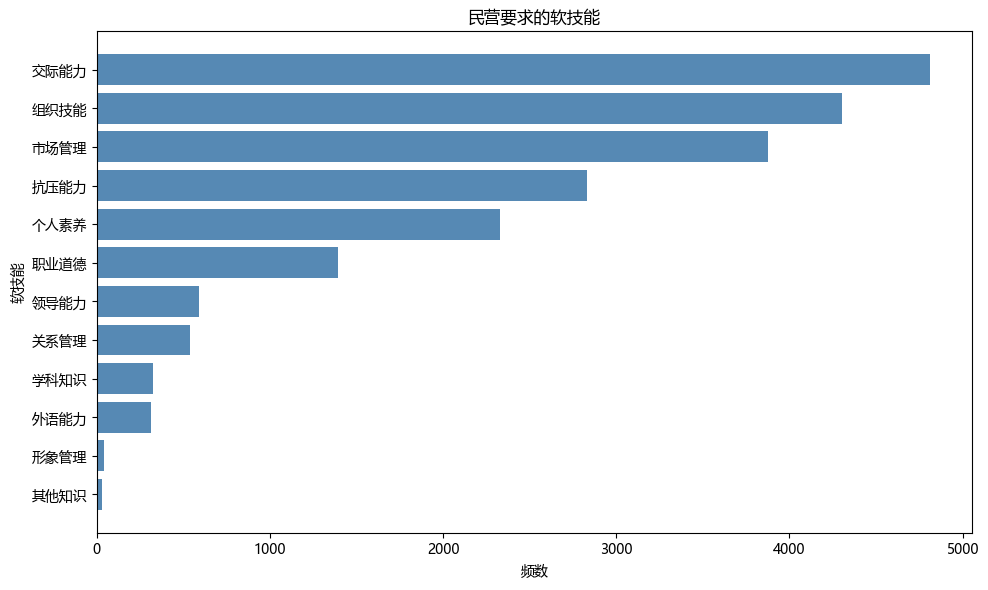

In [ ]:
# 民营要求的软技能
minying_soft_skills = soft_skills_sorted_by_comp_types_df[('民营', '技能')].dropna()
minying_soft_frequencies = soft_skills_sorted_by_comp_types_df[('民营', '频数')].dropna()

plt.figure(figsize=(10, 6))
plt.barh(minying_soft_skills, minying_soft_frequencies, color='#5689B4')
plt.xlabel('频数')
plt.ylabel('软技能')
plt.title('民营要求的软技能')
plt.gca().invert_yaxis() 
plt.tight_layout()

output_path = os.path.join("..\\img\\task3", "民营要求的软技能.png")
plt.savefig(output_path, dpi = 300, bbox_inches='tight')

## 与薪资水平的关联分析
由于灵活用工部分的招聘信息并未得出显著结论，故下面只考虑灵活用工部分

In [7]:
df_fixed = df[df['salary_type'] == 'M']

hard_skills_data = []
soft_skills_data = []

for _, row in df_fixed.iterrows():
    for skill in row['hard_skills']:
        hard_skills_data.append({'id': row['custom_id'], 'hard_skill': skill, 'salary_min': row['salary_min'], 'salary_max': row['salary_max']})
    for skill in row['soft_skills']:
        soft_skills_data.append({'id': row['custom_id'], 'soft_skill': skill, 'salary_min': row['salary_min'], 'salary_max': row['salary_max']})

hard_skills_df = pd.DataFrame(hard_skills_data)
soft_skills_df = pd.DataFrame(soft_skills_data)

In [57]:
hard_skills_df.head()
# soft_skills_df.head()

,id,hard_skill,salary_min,salary_max
0,Lcer-s-mfC1_DTn4Xhi8B,媒体运营,96000,144000
1,Lcer-s-mfC1_DTn4Xhi8B,视觉设计,96000,144000
2,Lcer-s-mfC1_DTn4Xhi8B,数据处理,96000,144000
3,Lcer-s-mfC1_DTn4Xhi8B,内容策略,96000,144000
4,j2iMOLV8nyaPmi7N4i7vW,媒体运营,120000,167999


In [8]:
hard_order = hard_skills_df['hard_skill'].value_counts().index # 按照数量从多到少排序
soft_order = soft_skills_df['soft_skill'].value_counts().index

hard_skills_df['hard_skill'] = pd.Categorical(hard_skills_df['hard_skill'], categories = hard_order, ordered = True)
hard_skills_df['salary_avr'] = (hard_skills_df['salary_min'] + hard_skills_df['salary_max']) / 2
hard_mean_salaries = hard_skills_df.groupby('hard_skill')['salary_avr'].mean().reindex(hard_skills_df)

soft_skills_df['soft_skill'] = pd.Categorical(soft_skills_df['soft_skill'], categories = soft_order, ordered = True)
soft_skills_df['salary_avr'] = (soft_skills_df['salary_min'] + soft_skills_df['salary_max']) / 2
soft_mean_salaries = soft_skills_df.groupby('soft_skill')['salary_avr'].mean().reindex(soft_skills_df)

In [22]:
# soft_skills_df.head()
soft_mean_salaries.head()

soft_skill
(Lcer-s-mfC1_DTn4Xhi8B, 组织技能, 96000, 144000, 120000.0)    NaN
(Lcer-s-mfC1_DTn4Xhi8B, 交际能力, 96000, 144000, 120000.0)    NaN
(j2iMOLV8nyaPmi7N4i7vW, 个人素养, 120000, 167999, 143999.5)   NaN
(j2iMOLV8nyaPmi7N4i7vW, 交际能力, 120000, 167999, 143999.5)   NaN
(j2iMOLV8nyaPmi7N4i7vW, 市场管理, 120000, 167999, 143999.5)   NaN
Name: salary_avr, dtype: float64

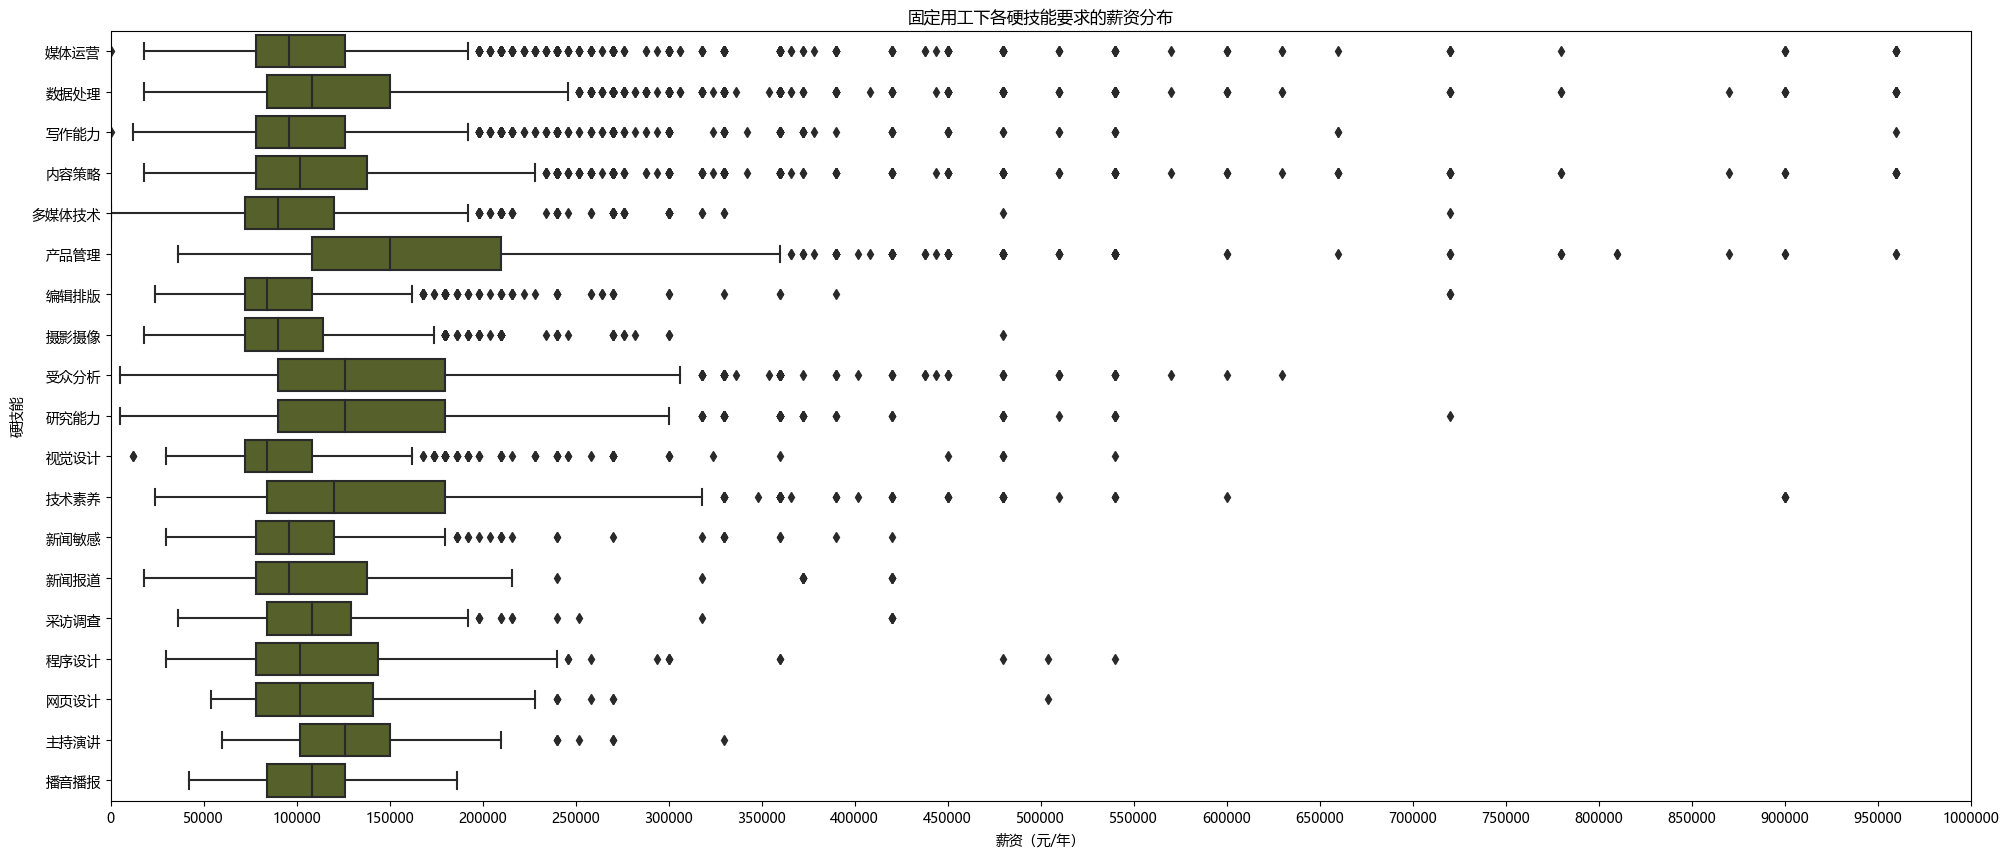

In [ ]:
plt.figure(figsize=(24, 10))
sns.boxplot(y='hard_skill', x='salary_avr', data = hard_skills_df, order = hard_order, color = "#5A6921")
plt.ylabel("硬技能")
plt.xlabel("薪资（元/年）")
plt.title("固定用工下各硬技能要求的薪资分布")

plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().xaxis.get_major_formatter().set_scientific(False)
plt.gca().xaxis.get_major_formatter().set_useOffset(False)
plt.xlim(0, 1000000)
plt.gca().xaxis.set_major_locator(MultipleLocator(50000))

output_path_hard = os.path.join("..\\img\\task3", "固定用工下各硬技能要求的薪资分布.png")
plt.savefig(output_path_hard, dpi=300, bbox_inches='tight')

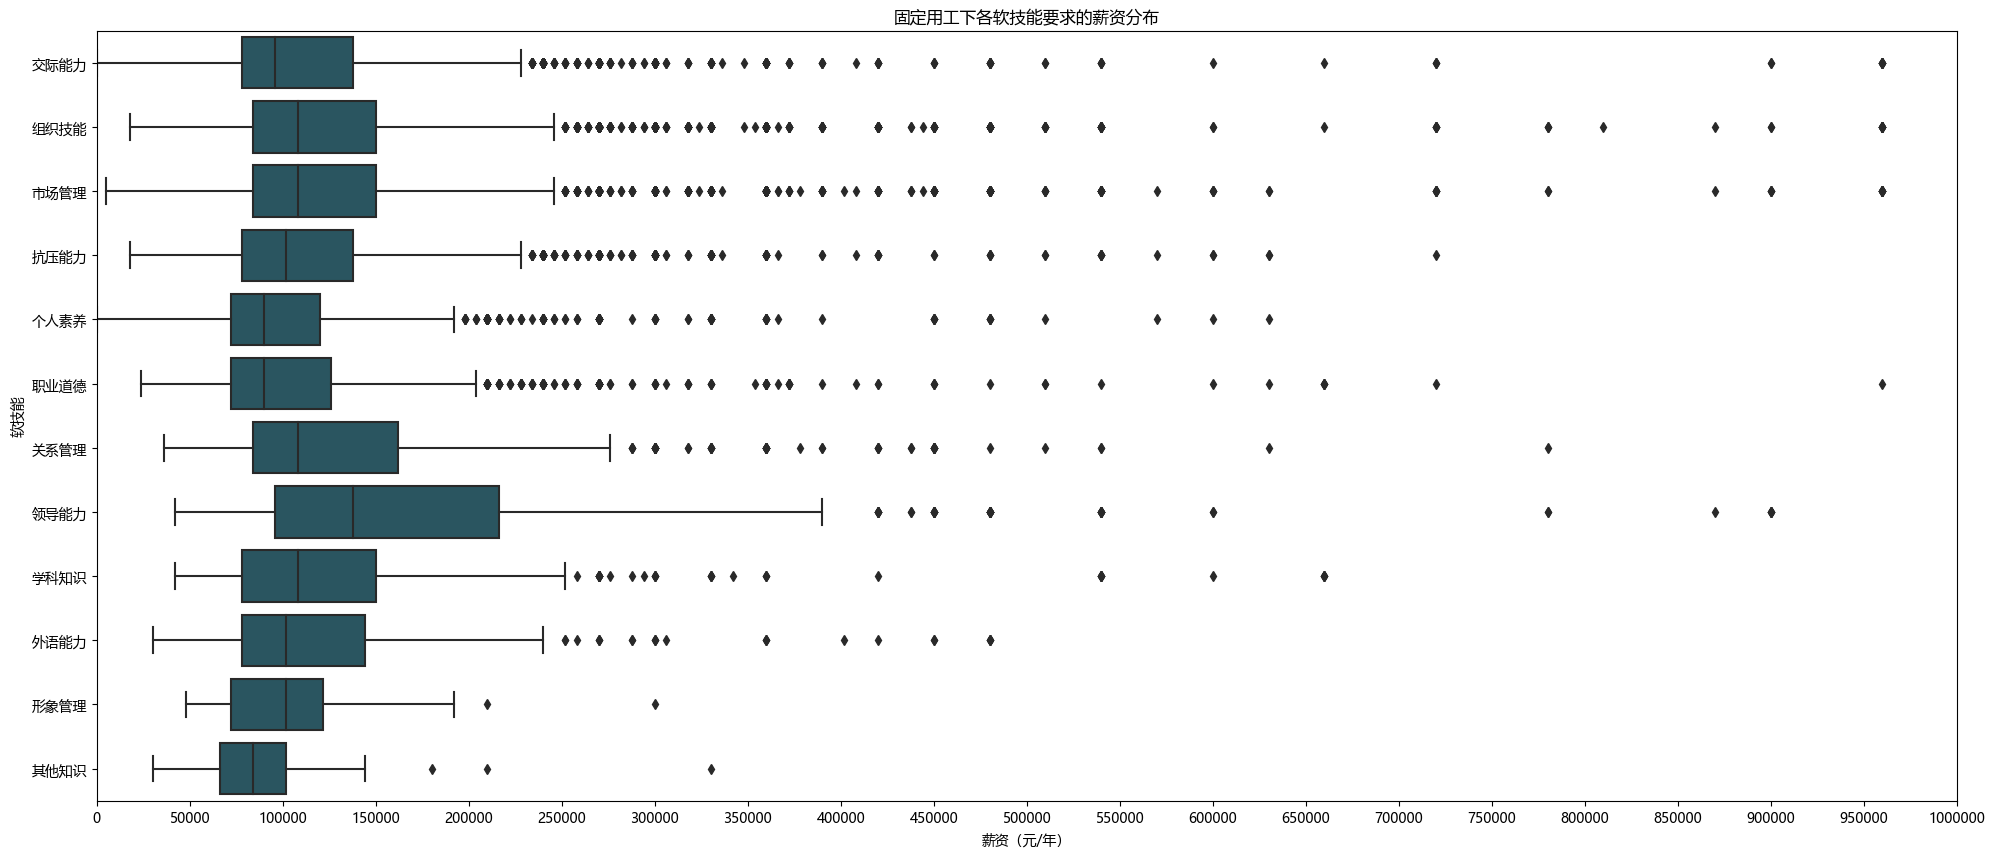

In [ ]:
# 绘制软技能的薪资分布
plt.figure(figsize=(24, 10))
sns.boxplot(y='soft_skill', x='salary_avr', data = soft_skills_df, order = soft_order, color = "#215A69")
plt.ylabel("软技能")
plt.xlabel("薪资（元/年）")
plt.title("固定用工下各软技能要求的薪资分布")

plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().xaxis.get_major_formatter().set_scientific(False)
plt.gca().xaxis.get_major_formatter().set_useOffset(False)
plt.xlim(0, 1000000)
plt.gca().xaxis.set_major_locator(MultipleLocator(50000))

output_path_hard = os.path.join("..\\img\\task3", "固定用工下各软技能要求的薪资分布.png")
plt.savefig(output_path_hard, dpi=300, bbox_inches='tight')

## 与学历要求的关联分析

### 硬技能

In [27]:
hard_skills_sorted_by_edu_df = co_analysis_for_else('学历', "hard")

   MBA/EMBA     中专/中技       初中及以下        博士         大专         学历不限       \
         技能 频数     技能   频数     技能 频数     技能  频数     技能    频数     技能   频数   
0      内容策略  2   媒体运营  157   写作能力  4   写作能力  11   媒体运营  3915   媒体运营  875   
1     多媒体技术  2  多媒体技术   95  多媒体技术  3   研究能力  10   数据处理  3184  多媒体技术  864   
2      摄影摄像  2   写作能力   79   数据处理  2   新闻报道   6   写作能力  3123   写作能力  643   
3      产品管理  1   数据处理   79   产品管理  1   内容策略   4   内容策略  3066   数据处理  579   
4      受众分析  1   内容策略   71   内容策略  1   编辑排版   4  多媒体技术  2686   内容策略  545   
5      数据处理  1   视觉设计   33   媒体运营  1   技术素养   3   产品管理  1047   摄影摄像  277   
6                产品管理   32   技术素养  1  多媒体技术   1   摄影摄像   934   产品管理  180   
7                摄影摄像   32   播音播报  1   数据处理   1   编辑排版   801   编辑排版  161   
8                编辑排版   25                        视觉设计   720   视觉设计  120   
9                技术素养   20                        受众分析   531   技术素养   95   
10               受众分析   11                        技术素养   416   受众分析   76   
11          

下面对比本科和硕士

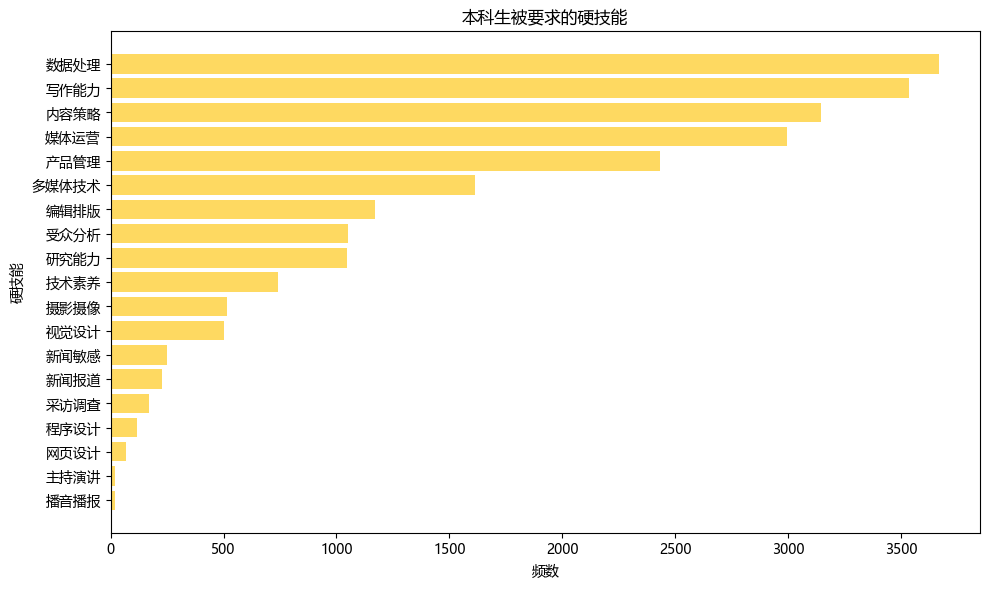

In [ ]:
# 本科要求的硬技能
undergraduate_hard_skills = hard_skills_sorted_by_edu_df[('本科', '技能')].dropna()
undergraduate_hard_frequencies = hard_skills_sorted_by_edu_df[('本科', '频数')].dropna()

plt.figure(figsize=(10, 6))
plt.barh(undergraduate_hard_skills, undergraduate_hard_frequencies, color='#FED961')
plt.xlabel('频数')
plt.ylabel('硬技能')
plt.title('本科生被要求的硬技能')
plt.gca().invert_yaxis() 
plt.tight_layout()

output_path = os.path.join("..\\img\\task3", "本科生被要求的硬技能.png")
plt.savefig(output_path, dpi = 300, bbox_inches='tight')

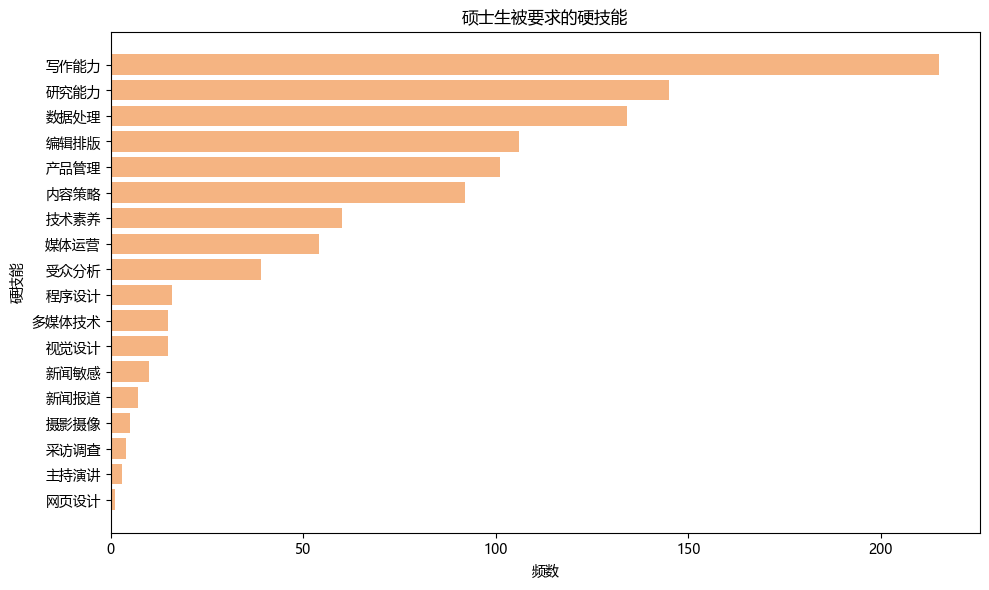

In [ ]:
# 硕士生要求的硬技能
master_hard_skills = hard_skills_sorted_by_edu_df[('硕士', '技能')].dropna()
master_hard_frequencies = hard_skills_sorted_by_edu_df[('硕士', '频数')].dropna()

master_hard_frequencies = pd.to_numeric(master_hard_frequencies, errors='coerce') 
master_hard_skills = master_hard_skills[master_hard_frequencies.notna()] 
master_hard_frequencies = master_hard_frequencies.dropna()  

plt.figure(figsize=(10, 6))
plt.barh(master_hard_skills, master_hard_frequencies, color='#F5B482')
plt.xlabel('频数')
plt.ylabel('硬技能')
plt.title('硕士生被要求的硬技能')
plt.gca().invert_yaxis() 
plt.tight_layout()

output_path = os.path.join("..\\img\\task3", "硕士生被要求的硬技能.png")
plt.savefig(output_path, dpi = 300, bbox_inches='tight')

### 软技能

In [33]:
soft_skills_sorted_by_edu_df = co_analysis_for_else('学历', "soft")

   MBA/EMBA    中专/中技      初中及以下       博士        大专        学历不限         本科  \
         技能 频数    技能   频数    技能 频数    技能  频数    技能    频数    技能   频数    技能   
0      组织技能  3  交际能力  140  交际能力  9  职业道德  11  交际能力  3460  交际能力  980  组织技能   
1      个人素养  2  抗压能力  104  个人素养  5  交际能力   7  市场管理  2806  抗压能力  697  交际能力   
2      市场管理  1  组织技能   89  抗压能力  2  组织技能   7  组织技能  2771  组织技能  607  市场管理   
3               市场管理   83  关系管理  1  抗压能力   4  抗压能力  2072  个人素养  544  抗压能力   
4               个人素养   78  市场管理  1  个人素养   2  个人素养  1580  市场管理  523  个人素养   
5               职业道德   49           外语能力   2  职业道德   922  职业道德  287  职业道德   
6               关系管理   27           学科知识   2  关系管理   416  领导能力  105  领导能力   
7               领导能力    7           领导能力   2  领导能力   389  关系管理   80  关系管理   
8               其他知识    2           市场管理   1  外语能力   147  学科知识   23  学科知识   
9               外语能力    2                     学科知识    96  其他知识   14  外语能力   
10              形象管理    2                     形象管理    35  形象管理   13  形象管理   

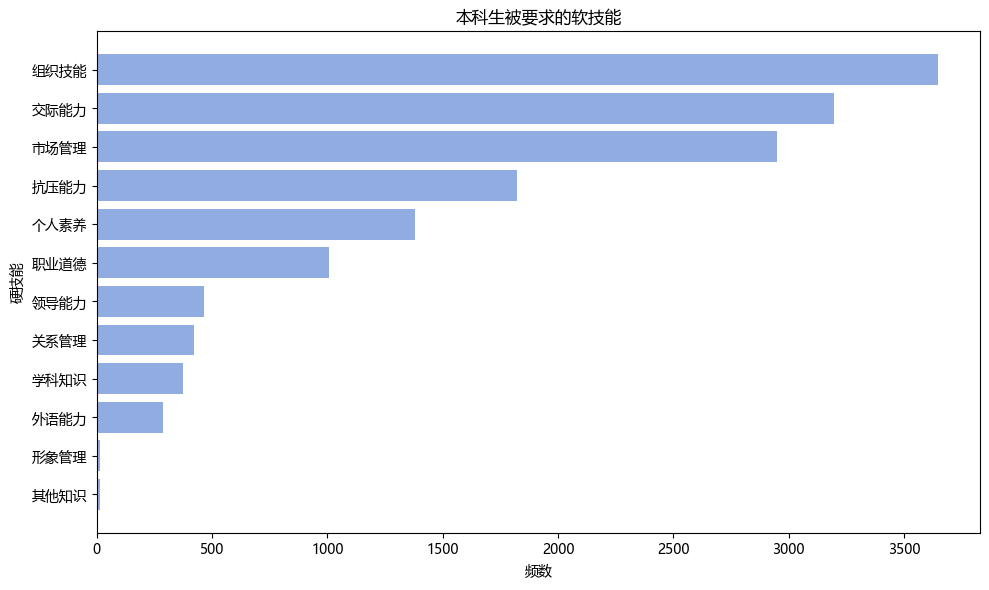

In [ ]:
# 本科要求的硬技能
undergraduate_soft_skills = soft_skills_sorted_by_edu_df[('本科', '技能')].dropna()
undergraduate_soft_frequencies = soft_skills_sorted_by_edu_df[('本科', '频数')].dropna()

plt.figure(figsize=(10, 6))
plt.barh(undergraduate_soft_skills, undergraduate_soft_frequencies, color='#91ACE0')
plt.xlabel('频数')
plt.ylabel('硬技能')
plt.title('本科生被要求的软技能')
plt.gca().invert_yaxis() 
plt.tight_layout()

output_path = os.path.join("..\\img\\task3", "本科生被要求的软技能.png")
plt.savefig(output_path, dpi = 300, bbox_inches='tight')

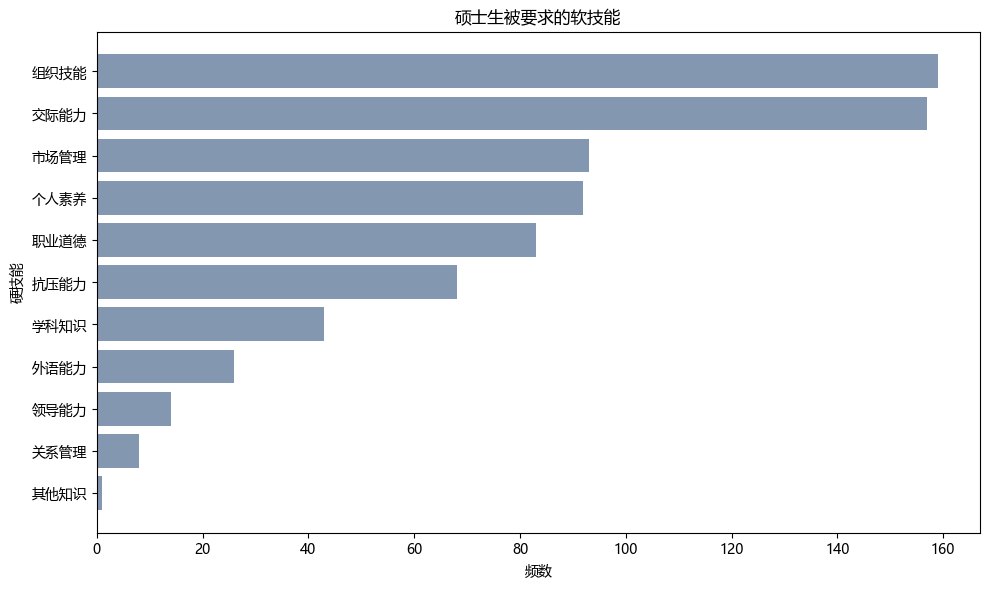

In [ ]:
# 硕士生要求的硬技能
master_soft_skills = soft_skills_sorted_by_edu_df[('硕士', '技能')].dropna()
master_soft_frequencies = soft_skills_sorted_by_edu_df[('硕士', '频数')].dropna()

master_soft_frequencies = pd.to_numeric(master_soft_frequencies, errors='coerce') 
master_soft_skills = master_soft_skills[master_soft_frequencies.notna()] 
master_soft_frequencies = master_soft_frequencies.dropna()  

plt.figure(figsize=(10, 6))
plt.barh(master_soft_skills, master_soft_frequencies, color='#8497B0')
plt.xlabel('频数')
plt.ylabel('硬技能')
plt.title('硕士生被要求的软技能')
plt.gca().invert_yaxis() 
plt.tight_layout()

output_path = os.path.join("..\\img\\task3", "硕士生被要求的软技能.png")
plt.savefig(output_path, dpi = 300, bbox_inches='tight')

## 与经验要求的关联分析

### 硬技能

In [38]:
hard_skills_sorted_by_exp_df = co_analysis_for_else('工作经验', "hard")

     1-3年        10年以上       1年以下        3-5年        5-10年        经验不限      
       技能    频数     技能  频数     技能   频数     技能    频数     技能   频数     技能    频数
0    媒体运营  3781   产品管理  72   媒体运营  209   数据处理  2034   产品管理  747   写作能力  2213
1    写作能力  3476   数据处理  64   写作能力  204   内容策略  1690   数据处理  719   媒体运营  1977
2    内容策略  3300   内容策略  54  多媒体技术  179   媒体运营  1645   内容策略  463   数据处理  1557
3    数据处理  3170   媒体运营  53   数据处理  175   写作能力  1454   媒体运营  441  多媒体技术  1512
4   多媒体技术  2665   写作能力  26   内容策略  134   产品管理  1380   写作能力  316   内容策略  1333
5    编辑排版   986   受众分析  26   编辑排版   82  多媒体技术   858   受众分析  246   编辑排版   798
6    产品管理   969   研究能力  23   视觉设计   52   受众分析   483   研究能力  194   产品管理   624
7    摄影摄像   949   技术素养  19   摄影摄像   51   研究能力   426   技术素养  189   摄影摄像   435
8    视觉设计   657   采访调查  12   产品管理   30   编辑排版   343  多媒体技术  112   研究能力   429
9    受众分析   552   新闻报道   6   受众分析   19   技术素养   342   编辑排版   61   技术素养   402
10   研究能力   435   编辑排版   6   技术素养   19   摄影摄像   313   视觉设计   41   受众分析   400

看看无经验要求的招聘岗（我们毕业前后会接触到的）对我们有哪些硬技能要求

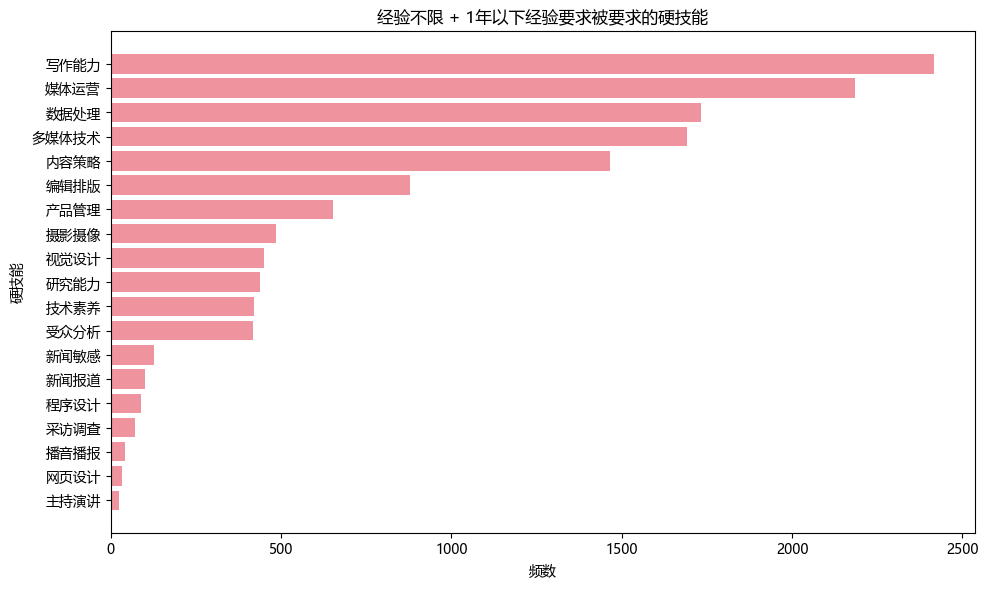

In [ ]:
# 一年以下 + 经验不限
one_year_below_hard_skills = hard_skills_sorted_by_exp_df[('1年以下', '技能')].dropna()
one_year_below_hard_frequencies = hard_skills_sorted_by_exp_df[('1年以下', '频数')].dropna()
no_exp_hard_skills = hard_skills_sorted_by_exp_df[('经验不限', '技能')].dropna()
no_exp_hard_frequencies = hard_skills_sorted_by_exp_df[('经验不限', '频数')].dropna()

one_year_below_hard_frequencies = pd.to_numeric(one_year_below_hard_frequencies, errors='coerce')
no_exp_hard_frequencies = pd.to_numeric(no_exp_hard_frequencies, errors='coerce')

one_year_below_hard_skills = one_year_below_hard_skills[one_year_below_hard_frequencies.notna()]
one_year_below_hard_frequencies = one_year_below_hard_frequencies.dropna()
no_exp_hard_skills = no_exp_hard_skills[no_exp_hard_frequencies.notna()]
no_exp_hard_frequencies = no_exp_hard_frequencies.dropna()

combined_skills = pd.concat([one_year_below_hard_skills, no_exp_hard_skills]).unique()
combined_frequencies = {skill: 0 for skill in combined_skills}

for skill in combined_skills:
    if skill in one_year_below_hard_skills.values:
        combined_frequencies[skill] += one_year_below_hard_frequencies[one_year_below_hard_skills == skill].sum()
    if skill in no_exp_hard_skills.values:
        combined_frequencies[skill] += no_exp_hard_frequencies[no_exp_hard_skills == skill].sum()

combined_df = pd.DataFrame(list(combined_frequencies.items()), columns=['技能', '频数'])
combined_df = combined_df.sort_values(by='频数', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(combined_df['技能'], combined_df['频数'], color='#EF949E')
plt.xlabel('频数')
plt.ylabel('硬技能')
plt.title('经验不限 + 1年以下经验要求被要求的硬技能')
plt.gca().invert_yaxis() 
plt.tight_layout()

output_path = os.path.join("..\\img\\task3", "经验不限+1年以下经验要求被要求的硬技能.png")
plt.savefig(output_path, dpi = 300, bbox_inches='tight')

### 软技能

In [39]:
soft_skills_sorted_by_exp_df = co_analysis_for_else('工作经验', "soft")

    1-3年       10年以上      1年以下       3-5年       5-10年       经验不限      
      技能    频数    技能  频数    技能   频数    技能    频数    技能   频数    技能    频数
0   交际能力  3254  组织技能  84  交际能力  226  组织技能  1935  组织技能  728  交际能力  2771
1   组织技能  2735  市场管理  63  抗压能力  159  市场管理  1777  市场管理  703  组织技能  1727
2   市场管理  2634  领导能力  36  组织技能  146  交际能力  1418  交际能力  385  抗压能力  1653
3   抗压能力  1922  交际能力  33  个人素养  126  抗压能力   853  抗压能力  247  个人素养  1580
4   个人素养  1451  抗压能力  25  市场管理  125  个人素养   485  领导能力  223  市场管理  1231
5   职业道德   820  关系管理  21  职业道德   63  职业道德   352  职业道德  135  职业道德  1001
6   关系管理   326  职业道德  16  关系管理   15  领导能力   294  关系管理  116  关系管理   283
7   学科知识   213  学科知识   9  领导能力   13  关系管理   214  个人素养   96  领导能力   210
8   领导能力   213  个人素养   7  外语能力    9  学科知识    96  学科知识   36  外语能力   187
9   外语能力   167  外语能力   2  形象管理    4  外语能力    84  外语能力   23  学科知识   182
10  其他知识    25            学科知识    3  其他知识    12  形象管理    3  形象管理    30
11  形象管理    21                       形象管理    10  其他知识    2  其他知识    20


看看无经验要求的招聘岗（我们毕业前后会接触到的）对我们有哪些软技能要求

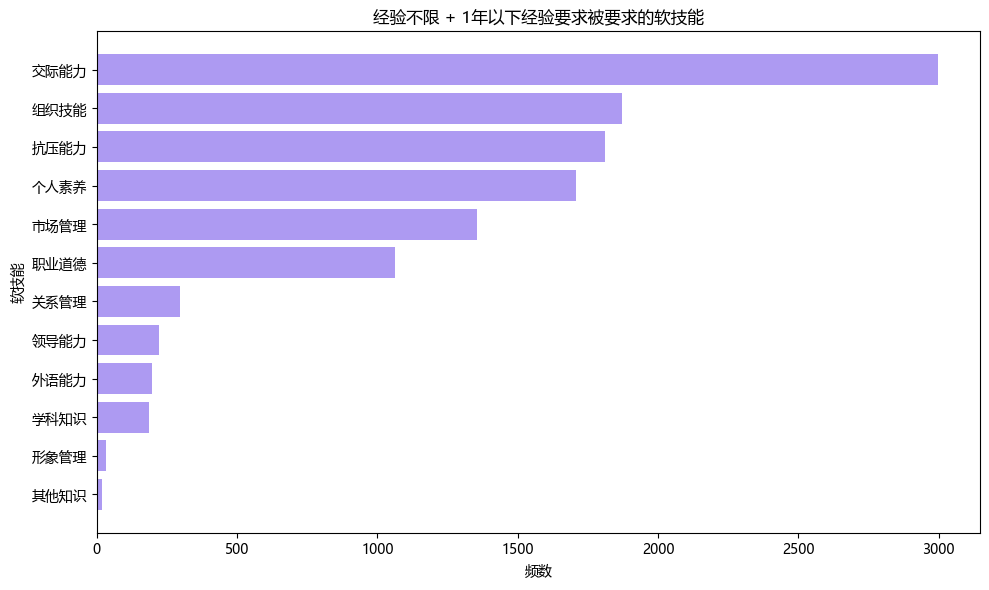

In [ ]:
# 一年以下 + 经验不限
one_year_below_soft_skills = soft_skills_sorted_by_exp_df[('1年以下', '技能')].dropna()
one_year_below_soft_frequencies = soft_skills_sorted_by_exp_df[('1年以下', '频数')].dropna()
no_exp_soft_skills = soft_skills_sorted_by_exp_df[('经验不限', '技能')].dropna()
no_exp_soft_frequencies = soft_skills_sorted_by_exp_df[('经验不限', '频数')].dropna()

one_year_below_soft_frequencies = pd.to_numeric(one_year_below_soft_frequencies, errors='coerce')
no_exp_soft_frequencies = pd.to_numeric(no_exp_soft_frequencies, errors='coerce')

one_year_below_soft_skills = one_year_below_soft_skills[one_year_below_soft_frequencies.notna()]
one_year_below_soft_frequencies = one_year_below_soft_frequencies.dropna()
no_exp_soft_skills = no_exp_soft_skills[no_exp_soft_frequencies.notna()]
no_exp_soft_frequencies = no_exp_soft_frequencies.dropna()

combined_skills = pd.concat([one_year_below_soft_skills, no_exp_soft_skills]).unique()
combined_frequencies = {skill: 0 for skill in combined_skills}

for skill in combined_skills:
    if skill in one_year_below_soft_skills.values:
        combined_frequencies[skill] += one_year_below_soft_frequencies[one_year_below_soft_skills == skill].sum()
    if skill in no_exp_soft_skills.values:
        combined_frequencies[skill] += no_exp_soft_frequencies[no_exp_soft_skills == skill].sum()

combined_df = pd.DataFrame(list(combined_frequencies.items()), columns=['技能', '频数'])
combined_df = combined_df.sort_values(by='频数', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(combined_df['技能'], combined_df['频数'], color='#AD9AF2')
plt.xlabel('频数')
plt.ylabel('软技能')
plt.title('经验不限 + 1年以下经验要求被要求的软技能')
plt.gca().invert_yaxis() 
plt.tight_layout()

output_path = os.path.join("..\\img\\task3", "经验不限+1年以下经验要求被要求的软技能.png")
plt.savefig(output_path, dpi = 300, bbox_inches='tight')

# 技能的共现模式
基于关联规则挖掘的呈现

In [16]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [8]:
skills_all = []

for id, skills in id_to_skills.items():
    flattened_skills = skills[0] + skills[1]
    skills_all.append(flattened_skills)

print(skills_all[:10])

[['媒体运营', '视觉设计', '数据处理', '内容策略', '组织技能', '交际能力'], ['媒体运营', '数据处理', '个人素养', '交际能力', '市场管理'], ['媒体运营', '数据处理', '组织技能', '交际能力'], ['数据处理', '内容策略', '媒体运营', '市场管理'], ['媒体运营', '数据处理', '个人素养', '抗压能力', '交际能力'], ['媒体运营', '内容策略', '数据处理', '组织技能', '市场管理'], ['数据处理', '媒体运营', '市场管理', '组织技能'], ['媒体运营', '数据处理', '市场管理'], ['媒体运营', '职业道德'], ['数据处理', '媒体运营', '市场管理', '交际能力']]


In [11]:
te = TransactionEncoder()
df_tf = te.fit_transform(skills_all)
df_skills_bool = pd.DataFrame(df_tf, columns = te.columns_)

df_skills_bool.head()

,个人素养,主持演讲,交际能力,产品管理,关系管理,其他知识,内容策略,写作能力,受众分析,外语能力,...,新闻敏感,研究能力,程序设计,组织技能,编辑排版,网页设计,职业道德,视觉设计,采访调查,领导能力
0,False,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
1,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
# 计算频繁项集
frequent_itemsets = apriori(df_skills_bool, min_support = 0.05, use_colnames = True)  
frequent_itemsets.sort_values(by = 'support', ascending = False, inplace = True)  

In [25]:
# 计算关联规则
# 提升度大于1.2，输出前十个符合规则的组合
association_rule = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1.2, num_itemsets = 10)

# 根据提升度排序
association_rule.sort_values(by='lift',ascending=False,inplace=True)   
association_rule.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
299,"(产品管理, 数据处理)","(组织技能, 市场管理)",0.127542,0.119074,0.050389,0.395082,3.317960,1.0,0.035203,1.456274,0.800737,0.256793,0.313316,0.409130
298,"(组织技能, 市场管理)","(产品管理, 数据处理)",0.119074,0.127542,0.050389,0.423178,3.317960,1.0,0.035203,1.512527,0.793040,0.256793,0.338855,0.409130
119,(多媒体技术),(摄影摄像),0.278658,0.093252,0.085986,0.308573,3.309025,1.0,0.060001,1.311415,0.967358,0.300731,0.237465,0.615329
118,(摄影摄像),(多媒体技术),0.093252,0.278658,0.085986,0.922085,3.309025,1.0,0.060001,9.258091,0.769559,0.300731,0.891986,0.615329
294,"(组织技能, 数据处理, 市场管理)",(产品管理),0.089645,0.199780,0.050389,0.562099,2.813584,1.0,0.032480,1.827399,0.708055,0.210803,0.452774,0.407162
303,(产品管理),"(组织技能, 数据处理, 市场管理)",0.199780,0.089645,0.050389,0.252224,2.813584,1.0,0.032480,1.217417,0.805506,0.210803,0.178588,0.407162
175,"(组织技能, 市场管理)",(产品管理),0.119074,0.199780,0.064032,0.537752,2.691717,1.0,0.040244,1.731149,0.713442,0.251282,0.422349,0.429133
178,(产品管理),"(组织技能, 市场管理)",0.199780,0.119074,0.064032,0.320513,2.691717,1.0,0.040244,1.296457,0.785397,0.251282,0.228667,0.429133
263,(市场管理),"(产品管理, 媒体运营)",0.341488,0.062778,0.053421,0.156437,2.491913,1.0,0.031983,1.111028,0.909173,0.152265,0.099932,0.503697
262,"(产品管理, 媒体运营)",(市场管理),0.062778,0.341488,0.053421,0.850958,2.491913,1.0,0.031983,4.418287,0.638805,0.152265,0.773668,0.503697


取关联性排名前十的10组相互正相关的技能，结果如上表所示